# Analyze grids of models for $\zeta$ Ophiuchi
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
root = "/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01"

In [4]:
# naming
def get_model_name(model):
    name = model.split('/')[-2]
    name = name.replace('_', '\_')
    return(name)

# for model in glob.glob(root+"/*/"):
#     get_model_name(model)

Text(0.5, 1.0, 'M1\\_24\\_M2\\_17\\_P\\_75')

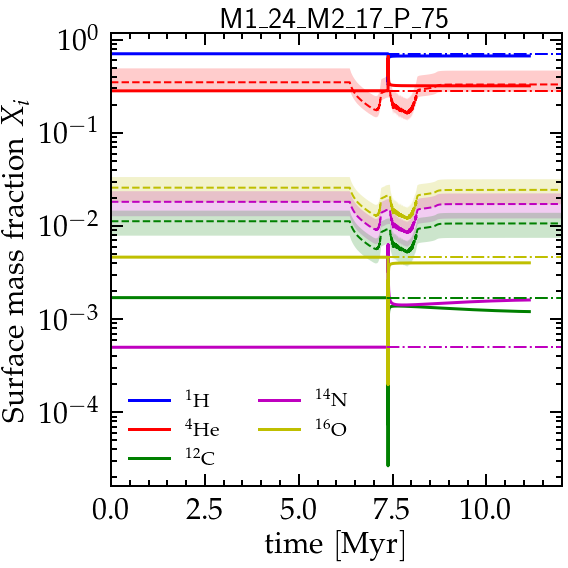

In [26]:
# composition one model
folder = "/mnt/ceph/users/mrenzo/RUNS/ZETA_OPH/Z_0.01/M1_24_M2_17_P_75/"
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0])
hfile1 = folder+'/binary_to_donor_Hedepl/LOGS2/history.data'
hfile2 = folder+'/accretor_to_TAMS/LOGS/history.data'
ax.set_xlim(0,12)
plot_surface_abundances(hfile1=hfile1, hfile2=hfile2, ax=ax, label="", legend=True, plot_expected=True)
ax.set_yscale('log')
ax.set_title(get_model_name(folder), size=30)

In [ ]:
def composition_vs_time(grid_folder):
    """ plot composition at surface for many models """
    print(colored(grid_folder, "blue"))
    print(colored("---------------", "blue"))
    # this might need adjustment later on
    models = glob.glob(grid_folder+"/*/")
    # define figure axis
    fig = plt.figure(figsize=(25,25))
    gs = gridspec.GridSpec(12,12)
    for model in models:
        name = get_model_name(model)
        bfile  = model+'/binary_to_donor_Hedepl/binary_history.data' 
        hfile1 = model+'/binary_to_donor_Hedepl/LOGS2/history.data'
        if os.path.isfile(model+'/accretor_to_TAMS/LOGS/history.data'):
            hfile2 = model+'/accretor_to_TAMS/LOGS/history.data'
        else:
            hfile2 = ""
        ax = fig.add_subplot(gs[models.index(model)])
        plot_surface_abundances(hfile1=hfile1, hfile2=hfile2, ax=ax, label="", legend=False)
        ax.set_xlabel("")
        ax.set_ylabel("")

# test
composition_vs_time(root)                

/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01
---------------


... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01/M1_28_M2_23_P_100//binary_to_donor_Hedepl/LOGS2/history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01/M1_28_M2_23_P_100//binary_to_donor_Hedepl/LOGS2/history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
... let me scrub this for you


/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01
---------------


/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01/M1_24_M2_17_P_75/
M1\_24\_M2\_17\_P\_75


1


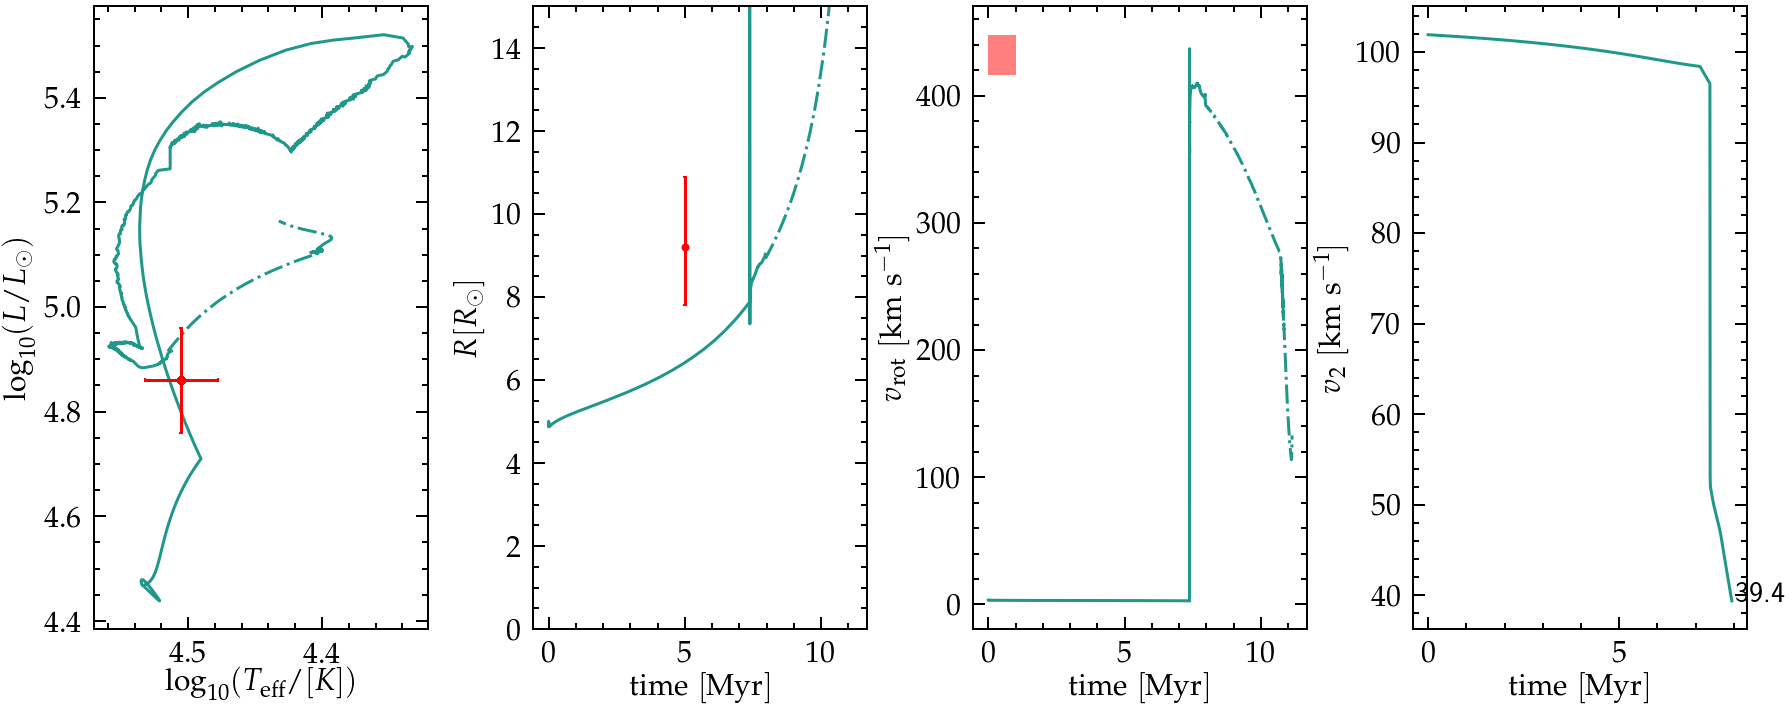

In [9]:
def diagnostic_agreement_zeta_oph(grid_folder):
    """ plot HRD, rotation and omega_div_omega_crit for many models """
    print(colored(grid_folder, "blue"))
    print(colored("---------------", "blue"))
    # this might need adjustment later on
    models = glob.glob(grid_folder+"/*/")
    rainbow = plt.cm.viridis(np.linspace(0,1,len(models)))
    # define figure axis
    fig = plt.figure(figsize=(25,10))
    gs = gridspec.GridSpec(1,4)
    # define axes
    # HRD
    ax_HRD = fig.add_subplot(gs[0])
    ax_HRD.invert_xaxis()
    ax_HRD.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
    ax_HRD.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    # radius vs. time
    ax_radius = fig.add_subplot(gs[1])
    ax_radius.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_radius.set_ylabel(r"$R [R_\odot]$")
    ax_radius.set_ylim(0,15)
    zeta_oph_radius(ax_radius)
    # rotation vs. time
    ax_rot = fig.add_subplot(gs[2])
    ax_rot.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_rot.set_ylabel(r"$v_\mathrm{rot} \ [\mathrm{km\ s^{-1}}]$")
    xmin, xmax = ax_rot.get_xlim()
    vsini, err_vsini = get_zeta_oph_vsini()
    ax_rot.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
    # bx_rot = ax_rot.twinx()
    # bx_rot.set_ylabel(r"$\omega/\omega_\mathrm{crit}$")
    # chemistry
    # ax_chem = fig.add_subplot(gs[3])
    # ax_chem.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    # ax_chem.set_ylabel(r"$\mathrm{Surface\ mass\ fraction}\ X_i$")
    # ax_chem.set_ylim(1e-4,1)
    ax_v2 =  fig.add_subplot(gs[3])
    ax_v2.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_v2.set_ylabel(r"$v_2 \ [\mathrm{km\ s^{-1}}]$")

    count_models = 0
    for model in models:
        name = get_model_name(model)
        # dirty fix for models that are running now
        if ('M1\_30' not in name) and \
           ('M1\_29' not in name) and \
           ('M1\_28' not in name) and \
           ('M1\_27' not in name) and \
           ('M1\_26' not in name) and \
           ('M1\_25' not in name):
            color  = rainbow[models.index(model)]
            bfile  = model+'/binary_to_donor_Hedepl/binary_history.data' 
            hfile1 = model+'/binary_to_donor_Hedepl/LOGS2/history.data'
            if os.path.isfile(model+'/accretor_to_TAMS/LOGS/history.data'):
                hfile2 = model+'/accretor_to_TAMS/LOGS/history.data'
            else:
                hfile2 = ""
            # --------------------------------------------
            # # select based on v2 orb
            srcb, colb = getSrcCol(bfile)
            v2 = srcb[:, colb.index("v_orb_2")]
            t = srcb[:, colb.index("age")]*1e-6
            v_threshold = 45
            if (v2[-1] > v_threshold):
                # print(colored("skip "+model+" because v2>45km/s","yellow"))
                continue
            # #--------------------------------------------
            # select based on final Teff
            src, col = getSrcCol(hfile1)
            logTeff = src[-1, col.index("log_Teff")]
            Teff =10**logTeff
            T_threshold = 32500
            if Teff<T_threshold:
                # print(colored("skip "+model+" because "+f"{Teff:.0f}"+" < "+ f"{T_threshold:.0f}","red"))
                continue
            # # # --------------------------------------------
            count_models += 1
            print(colored(f"{model}","blue"))
            print(colored(f"{name}","blue"))
            # HRD
            try:
                plot_HRD(ax_HRD, hfile1, c=color, hfile2=hfile2, bfile="", label=f"{name}")
            except:
                print(colored(model+" failed HRD", "red"))
            # radius
            try:    
                plot_radius_time(ax_radius, hfile1, c=color, hfile2=hfile2, label=f"{name}")
            except:
                print(colored(model+" failed radius", "red"))
            # rotational velocity
            try:
                plot_surface_rotation_time(ax_rot, hfile1, c=color, hfile2=hfile2, label=f"{name}")
                # plot_omega_div_omega_crit(bx_rot, hfile1, c=color, ls='--', hfile2="", label="")
            except:
                print(colored(model+" failed in rotation", "red"))
            try:
                plot_orbital_v2(ax_v2, hfile1, c=color)
            except:
                print(colored(model+" failed in v2", "red"))        
            # ax_radius.legend(fontsize=20, ncol=2)
        zeta_oph_HRD(ax_HRD)
    print(count_models)


# test
diagnostic_agreement_zeta_oph(root)


/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01
---------------


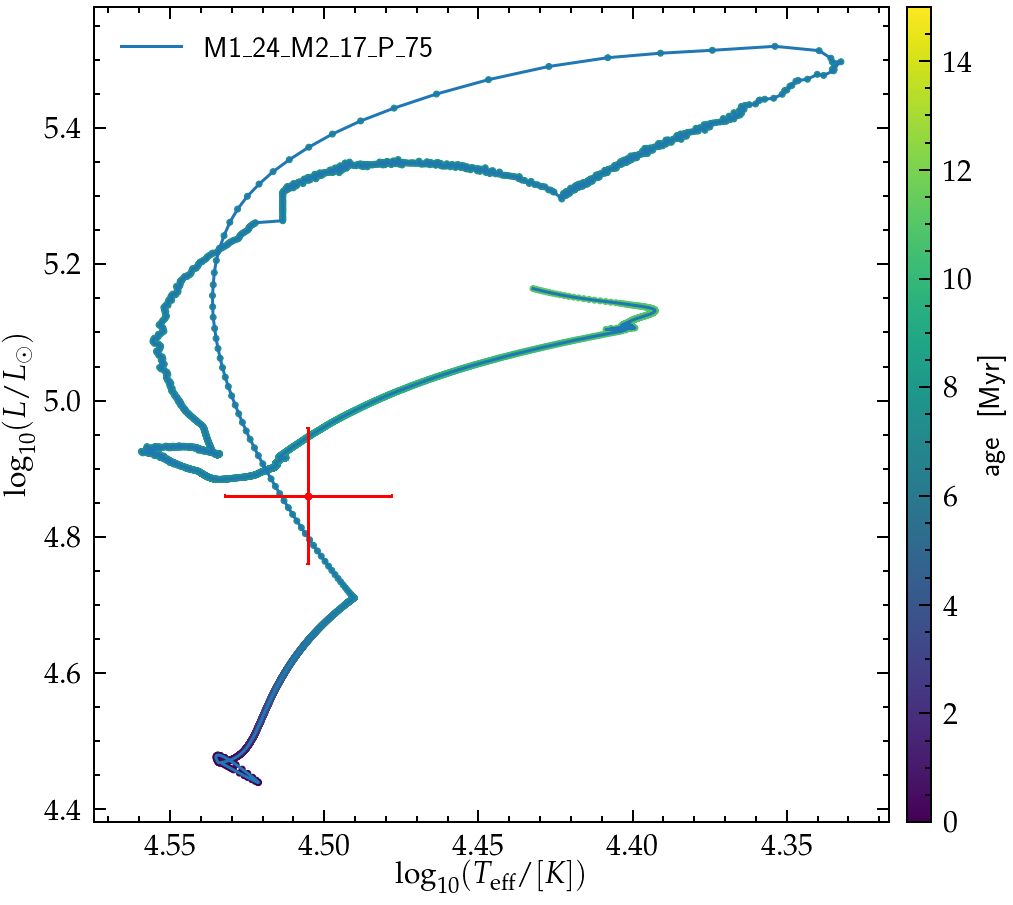

In [8]:
# make big HRD with lifetimes
def large_HRD(grid_folder):
    """ plot HRD and lifetimes """
    print(colored(grid_folder, "blue"))
    print(colored("---------------", "blue"))
    # this might need adjustment later on
    models = glob.glob(grid_folder+"/*/")
    rainbow = plt.cm.viridis(np.linspace(0,1,len(models)))
    # define figure axis
    fig = plt.figure(figsize=(15,15))
    gs = gridspec.GridSpec(100,100)
    ax = fig.add_subplot(gs[:,:95])
    cax = fig.add_subplot(gs[:,97:])
    for model in models:
        name = get_model_name(model)
        if ('M1\_30' not in name) and \
           ('M1\_29' not in name) and \
           ('M1\_28' not in name) and \
           ('M1\_27' not in name) and \
           ('M1\_26' not in name) and \
           ('M1\_25' not in name):
            color  = rainbow[models.index(model)]
            bfile  = model+'/binary_to_donor_Hedepl/binary_history.data' 
            hfile1 = model+'/binary_to_donor_Hedepl/LOGS2/history.data'
            if os.path.isfile(model+'/accretor_to_TAMS/LOGS/history.data'):
                hfile2 = model+'/accretor_to_TAMS/LOGS/history.data'
            else:
                hfile2 = ""
            # # select based on v2 orb
            srcb, colb = getSrcCol(bfile)
            v2 = srcb[:, colb.index("v_orb_2")]
            t = srcb[:, colb.index("age")]*1e-6
            if (v2[-1] > 45):
                # print(colored("skip "+model+" because v2>45km/s","yellow"))
                continue
            # #--------------------------------------------
            # select based on final Teff
            logL, logTeff = getlogLlogTeff(hfile1)
            Teff = 10**logTeff[-1]
            T_threshold = 32500
            if Teff<T_threshold:
                # print(colored("skip "+model+" because "+f"{Teff:.0f}"+" < "+ f"{T_threshold:.0f}","red"))
                continue
            # # # --------------------------------------------
            # if here, we want to plot
            if hfile2 != "":
                logL2, logTeff2 = getlogLlogTeff(hfile2)
                log_L = np.concatenate((logL, logL2))
                log_Teff = np.concatenate((logTeff, logTeff2))
                src1, col1 = getSrcCol(hfile1)
                src2, col2 = getSrcCol(hfile2)
                time = np.concatenate((src1[:, col1.index("star_age")], src2[:, col2.index("star_age")]))
                time *= 1e-6 # convert to Myr
                p = ax.scatter(log_Teff, log_L, c=time, vmin=0, vmax=15)
                ax.plot(log_Teff, log_L, label=name)
    ax.invert_xaxis()
    fig.colorbar(p, cax=cax)
    cax.set_ylabel(r"age \ [Myr]")
    ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
    ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    ax.legend()
    zeta_oph_HRD(ax)
large_HRD(root)

/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01
---------------


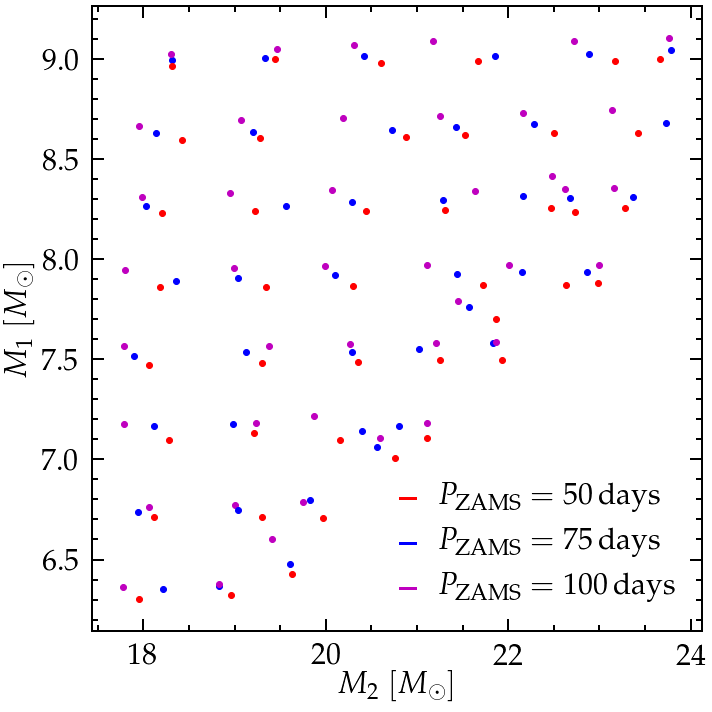

In [ ]:
def donor_masses(grid_folder):
    """ donor masses to get lifetimes """
    print(colored(grid_folder, "blue"))
    print(colored("---------------", "blue"))
    # this might need adjustment later on
    models = glob.glob(grid_folder+"/*/")
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(1,1)
    ax = fig.add_subplot(gs[0])
    rainbow = ['r', 'b', 'm']
    for model in models:
        name = get_model_name(model)
        if '50' in name:
            color=rainbow[0]
        elif '75' in name:
            color=rainbow[1]
        elif '100' in name:
            color=rainbow[2]
        bfile  = model+'/binary_to_donor_Hedepl/binary_history.data' 
        src, col = getSrcCol(bfile)
        M1zams = src[0, col.index("star_1_mass")]
        M2zams = src[0, col.index("star_2_mass")]
        M1final = src[-1, col.index("star_1_mass")]
        M2final = src[-1, col.index("star_2_mass")]
        
        ax.scatter(M2final, M1final, c=color)

    # legend
    ax.plot(np.nan, np.nan, c=rainbow[0], label=r"$P_\mathrm{ZAMS}=50\,\mathrm{days}$")
    ax.plot(np.nan, np.nan, c=rainbow[1], label=r"$P_\mathrm{ZAMS}=75\,\mathrm{days}$")  
    ax.plot(np.nan, np.nan, c=rainbow[2], label=r"$P_\mathrm{ZAMS}=100\,\mathrm{days}$")
    ax.legend(handlelength=0.5)
    ax.set_xlabel(r"$M_2 \ [M_\odot]$")
    ax.set_ylabel(r"$M_1 \ [M_\odot]$")
# test
donor_masses(root)        

In [ ]:
def test_one_var(dt, x, xmin, xmax):
    ind = (x<= xmax) & (x>= xmin)
    return np.sum(dt[ind])

def test_two_var(dt, x, xmin, xmax, y, ymin, ymax):
    indx = (x<= xmax) & (x>= xmin)
    indy = (y<= ymax) & (y>= ymin)
    ind = indy & indx
    return np.sum(dt[ind])
    
def score_model(folder):
    """
    calculate duration for which a model agrees within
    errorbars with $\zeta$ Ophiuchi observed values.
    The score is calculated summing the time in which the
    model agrees with each observable individually, higher is better.
    """
    score = 0
    src1, col1 = getSrcCol(folder+"/binary_to_donor_Hedepl/LOGS2/history.data")
    src2, col2 = getSrcCol(folder+"/accretor_to_TAMS/LOGS/history.data")
    timesteps = np.concatenate((src1[:, col1.index("log_dt")], src2[:, col2.index("log_dt")]))    
    # HR diagram location
    logL = np.concatenate((src1[:, col1.index("log_L")], src2[:, col2.index("log_L")]))
    log_Teff = np.concatenate((src1[:, col1.index("log_Teff")], src2[:, col2.index("log_Teff")]))
    # get observed values (check plot_aux.py for source and ref.)
    log_L_obs, err_log_L_obs,log_Teff_obs, err_log_Teff_obs = get_zeta_oph_L_teff()
    score += test_two_var(timesteps, logL, log_L_obs-err_log_L_obs, log_L_obs+err_log_L_obs, log_Teff, log_Teff_obs-err_log_Teff_obs, log_Teff_obs+err_log_Teff_obs)
    # ------------------------------------------------------
    
    
    return score
    
#test
folder = root+'/M1_24_M2_17_P_75/'    
score_model(folder)

                          

3320.4789498501123